# Facility Location

In [1]:
from itertools import product
from math import sqrt
import random
import numpy as np
from matplotlib import pyplot as plt
import networkx as nx

import gurobipy as gp
from gurobipy import GRB

[(19, 24), (5, 27), (11, 2), (30, 19), (9, 15), (30, 14), (16, 8), (2, 19), (22, 9), (19, 29), (19, 11), (22, 1), (8, 26), (12, 29), (14, 22), (20, 0), (10, 2), (22, 28), (0, 20), (5, 30), (23, 23), (3, 22), (4, 17), (26, 30), (0, 12), (8, 16), (6, 3), (7, 21), (11, 6), (2, 20)]


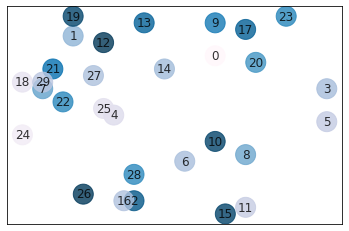

In [23]:
node_num = 30
node_range = 30
alpha = 100
storage_cost = []
node_pos = []

def compute_distance(loc1, loc2):
    dx = loc1[0] - loc2[0]
    dy = loc1[1] - loc2[1]
    return sqrt(dx*dx + dy*dy)


storage_cost = [random.uniform(0.2, 0.5) for _ in range(node_num)]
initial_cost = storage_cost.copy()
# node_pos = [(random.randint(5, node_range-5), random.randint(5, node_range-5)) for _ in range(node_num)]
node_pos = []
while len(node_pos) < node_num:
    new_p = (random.randint(0, node_range), random.randint(0, node_range))
    ok = True
#     for p in node_pos:
#         if compute_distance(p, new_p) < 5:
#             ok = False
    if ok:
        node_pos.append(new_p)

cartesian_prod = list(product(range(node_num), range(node_num)))
communication_cost = {(f1,f2): compute_distance(node_pos[f1], node_pos[f2]) for f1, f2 in cartesian_prod}
print(node_pos)
g=nx.DiGraph()
for i in range(node_num):
      g.add_node(i, pos=node_pos[i])

nx.draw_networkx(g, pos=nx.get_node_attributes(g, 'pos'), alpha=0.8,node_size=400, node_color=initial_cost, cmap=plt.get_cmap("PuBu"), with_labels=True)
plt.savefig("initial.svg")
plt.show()

In [16]:


m = gp.Model('facility_location')

# y[i] = 1: i 节点存储数据
y = m.addVars(node_num, vtype=GRB.BINARY, name='y')
# x[i][j] = 1: j 从 i 处取数据
x = m.addVars(node_num, node_num, vtype=GRB.BINARY, name='x')


m.addConstrs((gp.quicksum(x[i, j] for i in range(node_num)) >= 1 for j in range(node_num) ) , name="eq4")
m.addConstrs((y[i] >= x[(i, j)] for i, j in cartesian_prod ), name="eq5")

m.addConstr(y.sum() >= 2 , name='backup')
m.setObjective(alpha* y.prod(storage_cost)+x.prod(communication_cost), GRB.MINIMIZE)



In [4]:
def iterate(count, delta):
    for _ in range(count):
        m.setObjective(alpha* y.prod(storage_cost)+x.prod(communication_cost), GRB.MINIMIZE)
        m.optimize()
        g.clear()
        for i in range(node_num):
            g.add_node(i, pos=node_pos[i])
            for j in range(node_num):
                if(x[i, j].x == 1):
                    g.add_edge(j, i)
        nx.draw_networkx(g, pos=nx.get_node_attributes(g, 'pos'), alpha=0.8,node_size=400, node_color=storage_cost, cmap=plt.get_cmap("PuBu"), with_labels=True)
        plt.savefig(f"iter{_}.svg")
        plt.show()
        for i in range(node_num):
            if(y[i].x == 1):
                storage_cost[i] += delta
        m.update() 

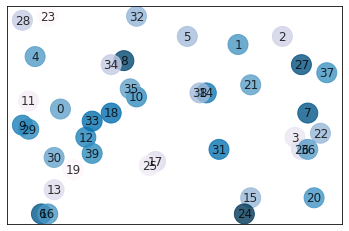

In [5]:
# storage_cost = initial_cost
g.clear()
for i in range(node_num):
    g.add_node(i, pos=node_pos[i])
nx.draw_networkx(g, pos=nx.get_node_attributes(g, 'pos'), alpha=0.8,node_size=400, node_color=storage_cost, cmap=plt.get_cmap("PuBu"), with_labels=True)
plt.show()

In [ ]:

# storage_cost = initial_cost
iterate(1, 0.05)

In [24]:
iterate(15, 0.01)

Gurobi Optimizer version 9.1.1 build v9.1.1rc0 (linux64)
Thread count: 8 physical cores, 16 logical processors, using up to 16 threads
Optimize a model with 111 rows, 110 columns and 310 nonzeros
Model fingerprint: 0xbb5b5bab
Variable types: 0 continuous, 110 integer (110 binary)
Coefficient statistics:
  Matrix range     [1e+00, 1e+00]
  Objective range  [5e+00, 4e+01]
  Bounds range     [1e+00, 1e+00]
  RHS range        [1e+00, 2e+00]

Loaded MIP start from previous solve with objective 201.686

Presolve removed 10 rows and 10 columns
Presolve time: 0.00s
Presolved: 101 rows, 100 columns, 290 nonzeros
Variable types: 0 continuous, 100 integer (100 binary)

Root relaxation: objective 1.369470e+02, 48 iterations, 0.00 seconds

    Nodes    |    Current Node    |     Objective Bounds      |     Work
 Expl Unexpl |  Obj  Depth IntInf | Incumbent    BestBd   Gap | It/Node Time

*    0     0               0     136.9470144  136.94701  0.00%     -    0s

Explored 0 nodes (48 simplex iterati

KeyError: (0, 10)

In [7]:
storage_cost 

[0.40897022468871735,
 0.38482314412580226,
 0.35749987657845844,
 0.300419279297154,
 0.36904914294396873,
 0.31076299709990335,
 0.459169719191726,
 0.4622377781756199,
 0.4767713220963023,
 0.4049953853708784,
 0.4153988502308403,
 0.3235759374216179,
 0.40101230242344454,
 0.307519944621316,
 0.40923564417463304,
 0.37249552618930815,
 0.373511001056249,
 0.2891230818046682,
 0.421510715673589,
 0.3062811970868293,
 0.3778166785982353,
 0.42281498819429464,
 0.322139822912689,
 0.3239341567761798,
 0.494038915996375,
 0.28992543420244093,
 0.3423407751225698,
 0.46624135900580255,
 0.3147968325920245,
 0.3903433262212699,
 0.35640866517011016,
 0.41784988783852595,
 0.325600062196231,
 0.4234619964890769,
 0.34606431495886664,
 0.41735964713201457,
 0.3644233229422795,
 0.37917080674923187,
 0.31396013737302214,
 0.3891627306714548]

In [ ]:
initial_cost

In [25]:

fake_cost = initial_cost.copy()
for i in range(15):
    chosed = random.sample(range(0, node_num), )
    for j in chosed:
        fake_cost[j] += 0.01
print(fake_cost)
print(np.std(storage_cost))
print(np.std(fake_cost))

[0.20967682799579432, 0.3300195148623497, 0.44708686241331985, 0.32489789839191335, 0.25948586067739726, 0.2835821404733516, 0.3126677506156465, 0.36738485322736447, 0.36097346018902343, 0.39126872266219337, 0.4744692638061272, 0.2908864641103334, 0.4755119071063358, 0.452176791870892, 0.3084368666330209, 0.4640963560641601, 0.3075045145023053, 0.4264884723103094, 0.24736725349251953, 0.45254361164979157, 0.37293595473823943, 0.42064911337740807, 0.39809685268275324, 0.38916451689983034, 0.2513564212881445, 0.2519439330949683, 0.47363554158782956, 0.3098011640494444, 0.3857022904529458, 0.29862930252980413]
0.0755210137332433
0.07800223514173704


In [ ]:
# 计算平均通信开销
cost1 = 0
for i in range(node_num):
    for j in range(node_num):
        if x[i,j].x == 1:
            cost1 += communication_cost[(i,j)]
print("cost1: ", cost1)
select = random.sample(range(0, node_num), 8)
print("select node: ", select)
cost2 = 0
for i in range(node_num):
    cc = [communication_cost[(i, n)] for n in select]
    cost2 += min(cc)
print("cost2: ", cost2)

In [ ]:
# 比较 storage_cost 和 communication_cost 量级，确定 alpha 取值
storage_obj = 0
for i in range(node_num):
    storage_obj += y[i].x * storage_cost[i]
print(storage_obj * alpha)


        
x_ans = [x[i, j].x for j in range(node_num) for i in range(node_num)]
communication = [v for k, v in communication_cost.items()]
communication_obj = 0
for i in range(node_num * node_num):
    communication_obj += x_ans[i] * communication[i]
print(communication_obj)


In [ ]:

nx.draw_networkx(g, pos=nx.get_node_attributes(g, 'pos'), node_color=storage_cost, cmap=plt.get_cmap("PuBu"), with_labels=True)
# plt.savefig("initial.svg")
plt.show()

In [ ]:
y_mat = [y[i].x for i in range(node_num)]
x_mat = []
for i in range(node_num):
    x_mat.append([])
    for j in range(node_num):
        x_mat[i].append(x[i,j].x)
print(x_mat)
print(y_mat)

In [ ]:
print(node_pos[7])

In [ ]:
move(6, [10,7])

In [ ]:
# 数据迁移算法
# 节点 i 移动，导致 communication_cost 改变，计算新的 x 和 y
# new_distance[j]: node 到节点 j 的新通信开销
def move(node, new_pos):
    new_distance = [compute_distance(new_pos, p) for p in node_pos]
    for j in range(node_num):
        if j == node:
            continue
        # 需要从节点 node 取数据且通信开销增大的节点
        if x_mat[node][j] == 1 and new_distance[j] > communication_cost[(node, j)]:
            min_cost = communication_cost[(node, j)] + storage_cost[node]
            print(f"min_cost: {min_cost}")
            transfer = -1
            for k in range(node_num):
                if y_mat[k] == 1 and new_distance[k] < min_cost:
                    min_cost = new_distance[k]
                    transfer = k
                    print(f"transfer for {j} to {k} existed!")
                elif y_mat[k] == 0 and new_distance[k] + storage_cost[k] < min_cost:
                    min_cost = new_distance[k] + storage_cost[k]
                    transfer = k
                    print(f"transfer for {j} to {k}")
            if transfer != -1:
                x_mat[node][j] = 0
                x_mat[transfer][j] = 0
                if y_mat[transfer] == 0:
                    y_mat[transfer] = 1
    fromNode = 0
    for j in range(node_num):
        fromNode += x_mat[node][j]
    if fromNode == 0:
        y_mat[node] = 0
        
    g1=nx.Graph()
    for i in range(node_num):
        if i == node:
            g1.add_node(node, pos=new_pos)
        else:
            g1.add_node(i, pos=node_pos[i])
    for i in range(node_num):
        for j in range(node_num):
            if(x[i, j].x == 1):
                g1.add_edge(i, j)
    nx.draw_networkx(g1, pos=nx.get_node_attributes(g1, 'pos'), node_color=storage_cost, cmap=plt.get_cmap("PuBu"), with_labels=True)
    # plt.savefig("initial.svg")
    plt.show()
    

In [ ]:
print